# E7. Face_recognition 

`26 JAN 2021`

--------------

> 1. 사진 모으기
> 2. 얼굴 영역 자르기
> 3. 얼굴 영역의 임베딩 추출하기
> 4. 모은 연예인들과 비교하기
> 5. 다양한 재미있는 시각화 시도해 보기

## 7-8. 프로젝트 : 나랑 닮은 연예인을 찾아보자

지금부터는 위에서 배운 내용을 토대로 연예인 사진과 나를 비교해 보는 시간을 갖도록 하겠습니다!



## Step1. 사진 모으기
비교하려면 사진을 모아야겠죠? 우선 나만 볼 테니 내 사진과 비교해 보고 싶은 연예인 사진을 모아봅시다. 평소에 닮았다고 생각했던 연예인 사진들을 모두 모아보는 것도 좋을 것 같네요.
사진을 하나의 디렉토리 안에 모아 봅시다. 모을 때 사진의 파일명은 가급적 장동건.jpg, 김태희.png와 같이 파일명이 사람 이름이 들어 있도록 하는 것이 좋습니다. (설마 이분들과 닮았다고 생각하시는 것은?? 😅)

1. 내 사진 찍기

- 내 사진을 2장 이상 포함합시다.
- 내 사진들끼리의 얼굴 임베딩 벡터 거리를 구해 봅시다. 닮았음을 확인할 수 있는 좋은 베이스라인이 될 수 있습니다.
- 혹시 내 사진들끼리의 거리가 멀게 나온다면 왜 그럴지 생각해 봅시다.


2. 비교할 연예인 사진 모으기

- 많이 모을수록 나와 더 닮은 연예인을 찾을 가능성이 높아질 것입니다.
- 주위의 동료들과 모은 사진을 주고받는 것도 하나의 방법입니다.


### 필요한 라이브러리 import

In [1]:
import face_recognition
import os
import matplotlib.pyplot as plt
import numpy as np

## Step2. 얼굴 영역 자르기

임베딩 추출을 위해서는 얼굴 영역을 잘라줘야 한다.

`get_gropped_face(image_file)`을 통해서 잘라줍시다! 

자른 이미지는 PIL의 Image.fromarray를 통해서 PIL Image로 변환한 뒤에 저장을 해두면 다양한 재미있는 시각화를 시도해 보는 데 도움이 된다.

PIL은 파이썬의 이미지 파일을 다루는 라이브러리이다.

In [2]:
#    힌트
#    from PIL import Image
#    face = get_gropped_face(image_path)
#    pillow_image = Image.fromarray(face)
#    pillow_image.save(path_to_save)

[(47, 113, 121, 38)]


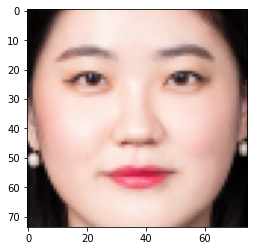

In [3]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/ME.png'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

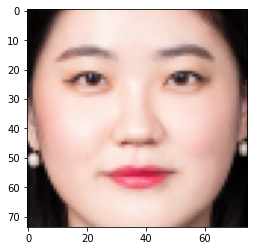

In [4]:
import matplotlib.pyplot as plt

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c, d:b, :]
    
    return cropped_face

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

In [5]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print("file_list: {}".format(file_list))

file_list: ['정우성.jpeg', '차은우.jpg', '지민(BTS).jpg', '남주혁.jpg', '손예진.jpeg', '박신혜.jpeg', '윤시윤.jpeg', '티파니.jpg', '서강준.jpg', '아이유.jpeg', '공효진.jpg', '이용진.jpg', '장희령.jpeg', '이희준.jpg', '박소담.jpeg', '손호준.jpeg', '송중기.jpeg', '효정.jpg', '권현빈.jpg', '정유미.jpg', '윤아.jpeg', '이민호.jpeg', '제이홉.jpg', '아린.jpg', '시우민.jpg', '류준열.jpeg', '박규영.png', '이효리.jpg', '조승우.jpeg', '박재범.jpg', '신혜선.jpeg', '아이린.jpeg', '수지.jpeg', '진기주.jpeg', '진.jpg', '도지한.jpg', '박보검.jpeg', '김유정.jpg', '조정석.jpg', '손흥민.jpg', '아이유.jpg', 'RM.jpg', '장동건.jpeg', '하정우.jpg', 'obama.jpg', '고아성.jpeg', '이종석.jpeg', '김남주.jpeg', '이다인.jpeg', '전소미.jpg', '윤균상.jpg', '유지태.jpg', '첸.jpg', 'me.png', '김C.jpeg', 'bush.jpeg', '최우식.jpg', 'trump.jpg', '안재홍.jpg', 'reagan.jpg', '서예지.jpeg', '기성용.jpg', '박보영.jpg', '김선호.jpeg', '강미나.jpg', '류준열.jpg', '서현진.jpg', '소주연.jpg', 'clinton.jpeg', '이제훈.jpeg', '현빈.png', '박서준.jpeg', '장원영.jpeg', '사쿠라.jpg', '강민경.jpg', '김고은.jpeg', '백진희.jpeg', '유재석.jpg', '강동원.jpg', '공유.jpeg', '하지원.jpeg', '신세경1.jpeg', '장도연.jpg', '이광수.jpg', '한효주.jpg', '박정민.jpg', '서

## Step3. 얼굴 영역의 임베딩 추출하기

이제 얼굴 영역으로 잘린 이미지들이 여럿 생겼을 텐데요. 그 이미지를 `face_recognition` 을 사용해서 이미지를 불러오고 임베딩을 추출해 봅시다. 다른 사람의 임베딩은 구분할 수 있게 따로 저장해 주세요. 이전에 만들었던 다음 함수들을 활용하면 손쉽게 수행 가능합니다.

- `def get_face_embedding(face)` : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
- `def get_face_embedding_dict(dir_path)` : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수


포함된 얼굴 영역의 임베딩 벡터를 구해 봅시다. 이전 스텝에서 이미지 파일의 얼굴 영역을 가져오는 `get_gropped_face() `함수를 구현한 바 있습니다. 이를 활용해 봅시다.

Face Recognition 패키지에서 제공하는 얼굴 임베딩 벡터를 구하는 함수는
`face_recognition.face_encodings()` 입니다. 다음 코드와 같이 사용하면 됩니다.

In [6]:
image_file = os.path.join(dir_path, '고아성.jpeg')
face = get_gropped_face(image_file)

def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)
embedding

[array([-0.00882398,  0.04001981, -0.04728831, -0.07233428, -0.09363247,
        -0.04181972, -0.03264488, -0.10799803,  0.12920775, -0.1083254 ,
         0.15143904, -0.08300079, -0.23564707, -0.05317711, -0.03147054,
         0.19658241, -0.1342783 , -0.19339091, -0.09084675,  0.03660752,
         0.09265362,  0.00210662, -0.03364831,  0.11351447, -0.05654598,
        -0.31862491, -0.10348261, -0.04359868, -0.05491794, -0.05268242,
        -0.03407851,  0.05341007, -0.16722621, -0.03647358,  0.07964224,
         0.10316036,  0.00571719, -0.12073281,  0.17200629,  0.00753512,
        -0.3022618 ,  0.08392984,  0.11567666,  0.23838997,  0.19536851,
        -0.01253911,  0.0024986 , -0.15628812,  0.15283005, -0.14703587,
         0.03760514,  0.12032825,  0.11001151,  0.07520753,  0.02702788,
        -0.15870455,  0.05421915,  0.13026069, -0.15216437, -0.02356652,
         0.09855704, -0.07380842, -0.00317034, -0.1447899 ,  0.19563369,
         0.07816654, -0.11202986, -0.26446876,  0.0

In [7]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

get_face_embedding_dict() 함수가 잘 만들어졌는지 확인해 봅시다.


밑에 dict가 out of line?이렇게 에러가 뜨면 사진에서 얼굴을 못찾아서 그렇기 때문에 사진에서 얼굴을 못찾았을때 예외 처리를 해줘야한다. try except사용하면 좋다. 

In [8]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
embedding_dict = get_face_embedding_dict(dir_path)

In [9]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['me']

array([-0.08037042,  0.06907122,  0.05199925, -0.10600494, -0.15424979,
       -0.06118616, -0.04224297, -0.115351  ,  0.08643807, -0.15023223,
        0.11620167, -0.10724699, -0.21451056, -0.03671584, -0.0721381 ,
        0.17936389, -0.1448911 , -0.12889758, -0.09181538, -0.0247224 ,
        0.06507792,  0.07653777,  0.01874369,  0.02013124, -0.08341447,
       -0.29730234, -0.10260355, -0.02237652, -0.0414858 , -0.0471116 ,
       -0.05258031,  0.0846685 , -0.1563676 , -0.05748671,  0.03643624,
        0.07579467, -0.01375574, -0.11046284,  0.13413027,  0.03347376,
       -0.25678009,  0.01506244,  0.07049499,  0.24919179,  0.18289824,
       -0.03212539, -0.00457386, -0.12778278,  0.12911597, -0.20352469,
        0.01417189,  0.13465139,  0.00848222,  0.03781489,  0.02022106,
       -0.06326012,  0.07090081,  0.14976104, -0.11431524, -0.00988651,
        0.15272048, -0.08812062, -0.05477061, -0.11320233,  0.2154204 ,
        0.0862088 , -0.11005161, -0.19371794,  0.11940184, -0.13

### 연예인 사진과 비교해보자

In [10]:
import numpy as np

#임베딩 사이의 거리를 구해보자
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('me', 'ME')

0.258774519085694

내 사진 두장의 거리를 계산해보았는데 다행히도? 내가 나를 닮았다고 인식했다. 

In [11]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1


In [12]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [13]:
get_nearest_face("ME", 5)

순위 1 : 이름(me), 거리(0.258774519085694)
순위 2 : 이름(공효진), 거리(0.3944652483713265)
순위 3 : 이름(박소담), 거리(0.42867083829904784)
순위 4 : 이름(효정), 거리(0.42877100880876545)
순위 5 : 이름(손예진), 거리(0.4379075524740013)


In [14]:
get_nearest_face("me", 5)

순위 1 : 이름(ME), 거리(0.258774519085694)
순위 2 : 이름(효정), 거리(0.3828547879418942)
순위 3 : 이름(박소담), 거리(0.389417016050133)
순위 4 : 이름(강미나), 거리(0.4000997483064907)
순위 5 : 이름(공효진), 거리(0.4153070527354113)


#### + 여기서 T-SNE방법으로 시각화 하는거 보완하기

이번엔 매우 부족한 실력으로 인해... DataFrame으로 간단하게 bar로 표현해보았습니다..

In [1]:
distance_dict = {'ME': 0.258774519085694,
 '효정': 0.3828547879418942,
 '박소담': 0.389417016050133,
 '강미나': 0.4000997483064907,
 '공효진': 0.4153070527354113,
 '손예진': 0.4242769203579555}

distance_dict

{'ME': 0.258774519085694,
 '효정': 0.3828547879418942,
 '박소담': 0.389417016050133,
 '강미나': 0.4000997483064907,
 '공효진': 0.4153070527354113,
 '손예진': 0.4242769203579555}

In [4]:
import pandas as pd

my_df =pd.DataFrame(list(distance_dict.values()),
                   index = ['me','hyojung','Parksodam','Gangmina','Gonghyojin','Sonyegin'],
                   columns = ['distance'])

my_df

,distance
me,0.258775
hyojung,0.382855
Parksodam,0.389417
Gangmina,0.400100
Gonghyojin,0.415307
Sonyegin,0.424277


AttributeError: 'function' object has no attribute 'show'

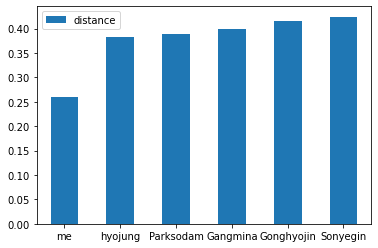

In [9]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import *
from matplotlib import*


my_df.plot(kind='bar', y = 'distance', rot=0)
plot.show()

### 다양한 시도해보기 - 부제 : 나는 엄마딸일까, 아빠 딸일까?


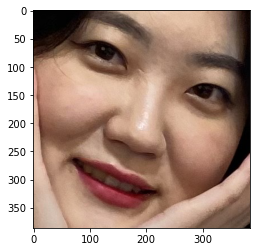

In [15]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/imagesf/me2.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

In [16]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/imagesf'
file_list = os.listdir(dir_path)

print("file_list: {}".format(file_list))

file_list: ['배요한.jpg', 'me.png', '아빠.PNG', 'me2.jpg', '엄마2.PNG', '엄마.PNG', 'ME.png']


In [17]:
image_file = os.path.join(dir_path, '배요한.jpg')
face = get_gropped_face(image_file)

def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)
embedding

[array([-0.06445068,  0.05116989,  0.03836577, -0.07957836, -0.08305804,
        -0.03865885, -0.06996658, -0.11486097,  0.08722579, -0.08426595,
         0.20998514, -0.0199009 , -0.23030934, -0.0968511 , -0.04339506,
         0.14520814, -0.1111857 , -0.10661636, -0.04888222,  0.00235673,
         0.11163258,  0.12226626,  0.04106516,  0.03268221, -0.14404023,
        -0.29734671, -0.09292096, -0.03417302, -0.04848288, -0.02644612,
        -0.05967201,  0.09137759, -0.20450111, -0.02392984,  0.06038571,
         0.11985788,  0.0109483 , -0.02927268,  0.1209444 ,  0.03646643,
        -0.23728912,  0.02875197,  0.03894633,  0.24905033,  0.19496244,
        -0.03571292,  0.01610907, -0.15332918,  0.06064972, -0.14436969,
         0.07904816,  0.13730145,  0.05124886,  0.05294357, -0.0178373 ,
        -0.08564059,  0.03005448,  0.13739839, -0.0944422 ,  0.00863009,
         0.12320599, -0.09410566, -0.06586596, -0.09925318,  0.17890328,
         0.02852627, -0.1359477 , -0.22779806,  0.0

In [18]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
    
    return embedding_dict

In [19]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['엄마']

array([-0.19844621,  0.12087894,  0.05933268, -0.07074526, -0.13372841,
       -0.0125727 , -0.03337597, -0.1665097 ,  0.13418643, -0.07959527,
        0.25235999, -0.09228459, -0.25702858,  0.00852001, -0.07211766,
        0.18663633, -0.13914363, -0.04661343, -0.04070397,  0.00528565,
        0.0304021 ,  0.02047353, -0.02117046,  0.0129666 , -0.07305292,
       -0.32080325, -0.06980529, -0.00038556, -0.06280324, -0.03752285,
       -0.04672492,  0.07912125, -0.15722586, -0.06522992,  0.04301472,
        0.12550226, -0.04309251, -0.08218819,  0.14452805, -0.0367464 ,
       -0.22555886,  0.02832794,  0.09889141,  0.23915181,  0.16463615,
       -0.02678669, -0.02968975, -0.17601611,  0.1469494 , -0.20860454,
       -0.04793344,  0.12907948,  0.00381674,  0.05110067, -0.03655245,
       -0.12128875,  0.02766503,  0.10655281, -0.14924335, -0.0611812 ,
        0.12724513, -0.07746622, -0.06869758, -0.13294916,  0.17004487,
        0.14606734, -0.12853771, -0.18161161,  0.07029177, -0.10

In [20]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('me2', '아빠')

0.5920901862704048

In [21]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('me2', '엄마')

0.40725120107515494

아빠 사진과 내 사진의 거리가 0.59 라니 

In [22]:
def get_nearest_face_10(name, top=10):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top):
        if i == 0:continue
        if sorted_faces[i]:
            print('순위 {}: 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [23]:
get_nearest_face("me2", 5)

순위 1 : 이름(me), 거리(0.3222641707567782)
순위 2 : 이름(ME), 거리(0.35687575295600654)
순위 3 : 이름(엄마2), 거리(0.4036296364353672)
순위 4 : 이름(엄마), 거리(0.40725120107515494)
순위 5 : 이름(배요한), 거리(0.48813969704344035)


In [24]:
get_nearest_face("ME", 5)

순위 1 : 이름(me), 거리(0.258774519085694)
순위 2 : 이름(me2), 거리(0.35687575295600654)
순위 3 : 이름(엄마2), 거리(0.45723939938160557)
순위 4 : 이름(배요한), 거리(0.46443045082828915)
순위 5 : 이름(엄마), 거리(0.48865998238195424)


In [25]:
get_nearest_face("me", 5)

순위 1 : 이름(ME), 거리(0.258774519085694)
순위 2 : 이름(me2), 거리(0.3222641707567782)
순위 3 : 이름(배요한), 거리(0.39920505013689817)
순위 4 : 이름(엄마2), 거리(0.4267383519695001)
순위 5 : 이름(엄마), 거리(0.46340587464355454)


그렇다. 나는 엄마딸로 판명났다. 

개인적으로는 아빠엄마의 반반 정도라고 생각했다. 그런데 결과는 아빠는 제일 안닮았다는 결과였고 엄마랑 더 닮았었다니 신기했다. 앞으론 엄마딸!ㅋㅋㅋㅋㅋ

세번째 결과는 남동생이  0.39의 결과로 거의 뭐 내 다른 사진이라고 보아도 무방한것 같다..ㅎ..


그래서 더 궁금해졌다 엄마가 내 나이였을때의 사진과의 닮음이 어느정도일지...(개인적으로 시도해봐야겠다.)

#### 해보고싶은 아이디어!

가족사진, 단체사진에서 이미지 찾기 



## 어려움

- 슬랙에 올라온 크롤링 된 이미지들을 사용헀다가 이미지 인식이 안되서 결국 다시 이미지를 수집했다. 어떤 프로젝트이던 간에 기본 데이터의 질은 매우 중요하다.

- 고차원 -> 저차원?


- 나온 결과값을 가지고 matplotlib로 여러 그래프로 나타내고싶었다. 근데 대입이 잘 안되서 오류가 난다ㅠ..

- face recognition viualization이라고 구글에 검색하면 노드에서 나온것 처럼 t-SNE와 PCA 방법을 많이 이용해서 시각화를 한다. 나도 이 방법중 T-SNE방법으로 시각화를 시켜보고싶었는데 성공을 못했다...



- 1. 결과값을 시각화 시킬때 어떻게 변환 시켜서 대입을 해야할지 모르겠다.(변수지정, 차원에러)

 2. 구글링을 통해 정말 많은 코드들을 찾아보았는데 아직도 중간에서 해결을 못하고 있다. 

 -> 더 찾아보고 방법을 알아내서 꼭 성공해서 보완해야겠다..
 
 

## 느낀점 

- 역시 이미지인식에 관련된 노드가 제일 재미있는것 같다. NLP너무 어렵지만 내가 넘어야할 산이다. 추천시스템도... 어렵다. 관심있는 분야가 너무 어려워서 고민이다. 하하.


- 별안간 Face Embedding을 이곳저곳 검색을 해보다가 재미있는 프로젝트를 한 블로그를 발견하였다. 처음에 E3노드에서도 비슷하게 단체사진인식에 대해서 좀 더 여러가지를 적용해보고 싶었는데 시간이 없어 못했었는데 이번에도 단체사진에서 원하는 인물을 인식하거나, 얼굴인식을 한후 나이, 성별을 나타내는 활동들이 있어 해보고싶었다. 


- [dilb,face_recognition 모듈을 이용한 얼굴인식](https://blog.naver.com/jadeinher20s/221878354347)

- 성별&나이 추정, 얼굴인식 & 이름찾기 , 감정분석 
[Face_Recognition](https://blog.naver.com/handuelly/221854672632)

이렇게 하고 face id 인식까지 이어질 수 있는 미니프로젝트의 연장선이 될 수 있을것 같다!

그러나.. 밀린 노드들에, 과제가 너무 많아 더 나아가서 진행은 못하였다. 설연휴나 여유가 생기면 꼭 진행해봐야겠다. 


- 재미있어서 그랬는지 이전보다 어렵다라는 느낌은 덜했다. 하지만 아직 필요한 코드에 대해 직접 더 깊게 생각해보거나 더 좋은 방향으로 만들어보는거에는 부족함이 있다. 일단 욕심내기보다는 많이 보고 익숙해지면 생각하는 깊이가 깊어질것이라고 생각한다. 


- 재미있는 아이디어나 해보고싶은게 생기면 그날 바로 실행 해봐야겠다. 미루면 결국 못한다. 


- 일부러 사진 데이터를 남성,여성 사진을 골고루 섞었는데 남자연예인의 사진도 5위안에 들었으면? 하는 생각이있었는데 없었다. 다른분들 결과를 보아도 성별이 같은 연예인 결과가 나온것 같다.


- 작년인가 제작년에 열풍이었던 닮은꼴 연예인 찾기 어플! 사실 해보지 않았는데 이번 노드를 해보니 궁금해졌다. 과연 이번 노드 결과와 비슷하게 나올것인지? 닮은 얼굴을 찾는다 라는 것이 어떤 원리로 되는지 한번도 생각해본적이 없었다. 그냥 육안상으로만 닮았다, 비슷하다, 분위기가 난다. 이렇게만 생각했지 얼굴 이미지를 인식해서, 특징을 추출해 모델이 특징을 잘 비교할 수 있도록 학습을 시키는 이론을 알게되어 새로웠다.



- 해보고 싶은건 많은데 구현이 안되서 내자신한테 답답하고 속상했다. 코딩공부를 하고 있지만 노드에서의 구현도 어렵고 구글에서 찾는다고해도 대입을 제대로 못하니 그 부분에서 너무 꽉막혀버렸다. 더 찾아보고 하나하나 대입해보면서 답을 찾아가는 수밖에 없다. 그래도 지금 할 수있는 방법을 다 찾아서 해봐야겠다고 생각했다. 처음엔 쉬웠지만 마지막에 시각화 하면서 커다란 숙제를 받았다. 


### 부족한 개념 공부하자! 


- 임베딩

Embedding은 고차원의 정보를 상대적으로 낮은 차원으로 변환하는 것을 의미한다. 아무 숫자로 바꾸는 것이 아니라 정보를 보존해야 한다. Self Attention: 이름 분류기에서 Self Attention을 사용해 Embedding한 이름들은 그들이 가진 맥락을 2차원 공간에서도 어느정도 드러냈다. 이름들은 성별에 따라, 그리고 발음에 따라 비슷한 것끼리 가깝게, 이질적인 것끼리는 서로 멀게 위치했다.

https://jsideas.net/ImageEmbeddingWithTripletLoss/

- 임베딩 벡터

- 